https://www.kaggle.com/spscientist/students-performance-in-exams

In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from pylab import subplot
from itertools import combinations
from scipy.stats import chi2_contingency

# Data loading and general data inspection

In [3]:
df = pd.read_csv('StudentsPerformance.csv')
df.head(3)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
num_cols = df.select_dtypes(exclude = 'O').columns
cat_cols = df.select_dtypes(include = 'O').columns

<i>This dataset hasnt Nan-values, that way we can proceed to analysis and visualization.

## Analysis attributes of score

In [6]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


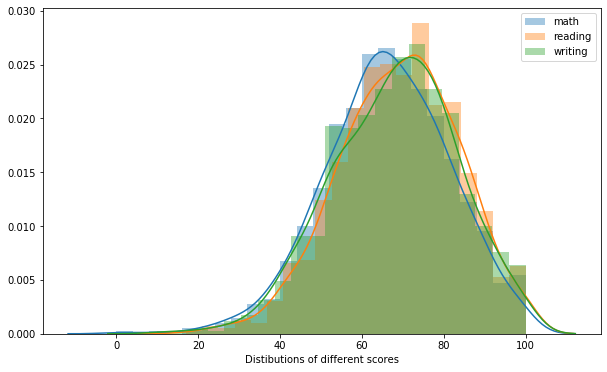

In [7]:
plt.figure(figsize = (10, 6))
sns.distplot(df['math score'], label = 'math')
sns.distplot(df['reading score'], label = 'reading')
sns.distplot(df['writing score'], label = 'writing')
plt.xlabel('Distibutions of different scores')
plt.legend()
plt.show()

<i>As we see, there aren't significulty differences in distributions of score-attributes.<br>
Let's check out correlations between this features.

In [8]:
df[num_cols].corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


<i>Assumptions and consumptions:
* Reading and writing have a very high correlation.It is so because writing and reading tests were on the same language, and knowledge of language includes skills of reading, writing, speaking and listening. 
* 'Math' has a high correlation with other features. Probably the number of students who prepares only for math exam or only for language exam is low or even zero(Students usually prepare for all exams or do not prepare at all)

## Visualization and analysis of categorical features

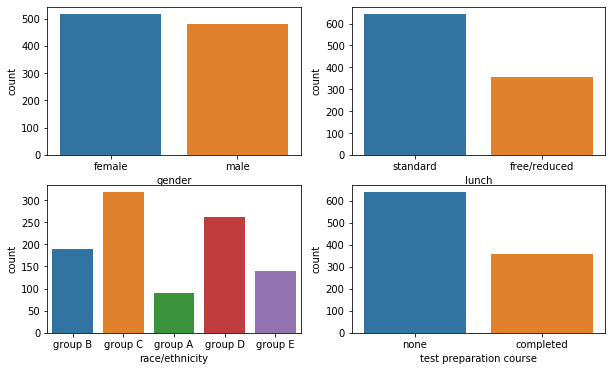

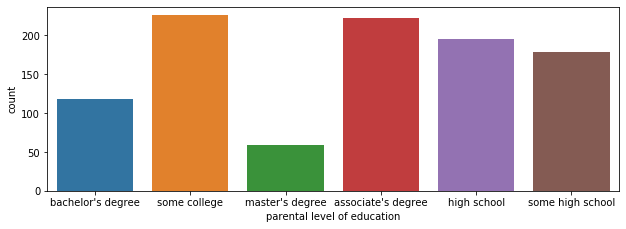

In [9]:
plt.figure(figsize = (10, 6))
 
subplot(2, 2, 1)
sns.countplot(df['gender'])

subplot(2, 2, 2)
sns.countplot(df['lunch'])

subplot(2, 2, 3)
sns.countplot(df['race/ethnicity'])

subplot(2, 2, 4)
sns.countplot(df['test preparation course'])

plt.figure(figsize = (17, 6))
subplot(2, 2, 2)

sns.countplot(df['parental level of education'])
plt.tight_layout()    
# или можно сделать круговые диаграммы

<i>There is no big difference in number of objects between classes in any feature. All classes are quite balanced. 
<br>Now lets try to find out the relationship between this features. 

In [10]:
cat_combs = combinations(cat_cols, 2)
n = len(df.index)

In [11]:
for pair in cat_combs:
    table_for_chi2 = pd.crosstab(df[pair[0]], df[pair[1]])
    stat, p_val, a, b = chi2_contingency(table_for_chi2)
    print('Pair: {0}\np-value of h0(independence pair attributes): {1}\n correlation = {2}\n'.format(pair, round(p_val, 5), 
                                                                                                     round(np.sqrt(stat/n), 5)))

Pair: ('gender', 'race/ethnicity')
p-value of h0(independence pair attributes): 0.06042
 correlation = 0.09501

Pair: ('gender', 'parental level of education')
p-value of h0(independence pair attributes): 0.64087
 correlation = 0.05818

Pair: ('gender', 'lunch')
p-value of h0(independence pair attributes): 0.54206
 correlation = 0.01928

Pair: ('gender', 'test preparation course')
p-value of h0(independence pair attributes): 0.90083
 correlation = 0.00394

Pair: ('race/ethnicity', 'parental level of education')
p-value of h0(independence pair attributes): 0.07911
 correlation = 0.17164

Pair: ('race/ethnicity', 'lunch')
p-value of h0(independence pair attributes): 0.4867
 correlation = 0.05867

Pair: ('race/ethnicity', 'test preparation course')
p-value of h0(independence pair attributes): 0.24083
 correlation = 0.07408

Pair: ('parental level of education', 'lunch')
p-value of h0(independence pair attributes): 0.9531
 correlation = 0.03334

Pair: ('parental level of education', 'test 

<font size = 3><i>We are not able to deny the hypothesis of independence of variables at significance level is equal 0.05<br> 
Let's have a look at pairs which have significance level less then 0.1 

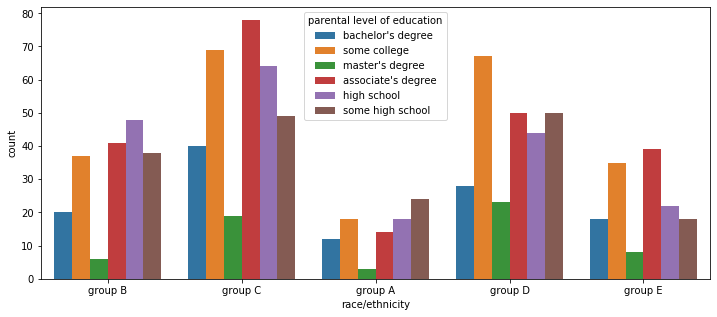

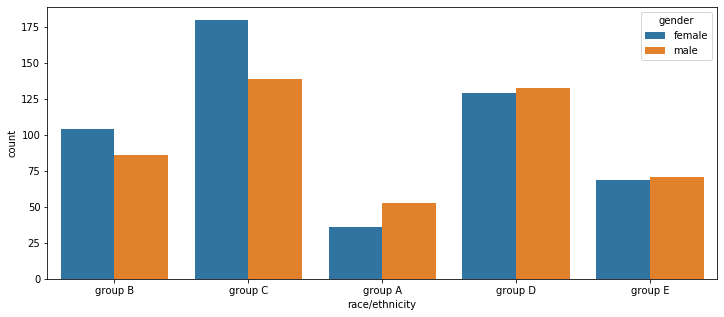

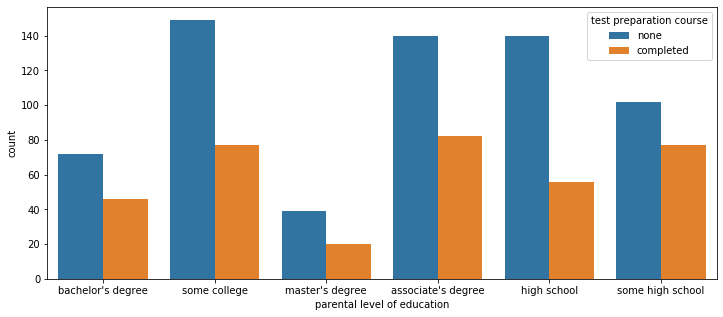

In [13]:
plt.figure(figsize = (12, 5))
sns.countplot(df['race/ethnicity'], hue = df['parental level of education'])
plt.show()

plt.figure(figsize = (12, 5))
sns.countplot(df['race/ethnicity'], hue = df['gender'])
plt.show()

plt.figure(figsize = (12, 5))
sns.countplot(df['parental level of education'], hue = df['test preparation course'])
plt.show()

Видно, что в разных классах доли меняются, но говорить о какой либо зависимости тоже нельзя.(Например бакалавры и мастеры имеют +- одинаковые доли во всех классах, расы A, E, D имеют схожий гендерный состав, в последней паре вообще незаметны отличия)<br>
Если обратиться к здравому смыслу, то мы получили вполне очевидные результаты. Например: пол не влияет на вид ланча или раса не влияет на прохождение курса подготовки к экзаменам. Однако, там где казалось бы должна быть связь (образованные родители,уже знающие о пользе курсов, чаще заставляют своих детей посещать доп курсы и тп) мы наблюдаем уровень значимости намного меньший чем у независимых признаков(по здравому смыслу)<br>
Итак мы подошли к самому интересному

<font size=3><i>We can see that proportions changing in different classes but its too early to talk about correlation. (For example, bachelos and masters have almost the same proportion in any class. Rase A, E and D have same gender composition, however Rase B and C are essential different from other races. Last pair hasnt strikly difference in all classes).<br>
The results are pretty obvious, e.g. sex doesn't affect the type of lunch, race doesn't affect the test preparation course. But there are some contradictions, sometimes relationship of independent features are much bigger then correlation between features like making child take courses by educated parents which know the benefits of courses.<br><br>
Now, the most interesting part starts

## Influence of all features on target attributes

In [49]:
# binary attributes
for cat_col in ['gender', 'lunch', 'test preparation course']:
    print('\n', cat_col.upper())
    val1 = df[cat_col].unique()[0]
    val2 = df[cat_col].unique()[1]
    for col in num_cols:
        df['n'] = (df[col] - df[col].mean())/df[col].std()
        diff = df[df[cat_col] == val1]['n'].mean() - df[df[cat_col] == val2]['n'].mean()
        print('Correlation with %s =' % col, abs(round(diff, 5)))
    

del df['n']


 GENDER
Correlation with math score = 0.33601
Correlation with reading score = 0.4887
Correlation with writing score = 0.60254

 LUNCH
Correlation with math score = 0.7329
Correlation with reading score = 0.4795
Correlation with writing score = 0.51335

 TEST PREPARATION COURSE
Correlation with math score = 0.37048
Correlation with reading score = 0.50407
Correlation with writing score = 0.65244


Wow. We got all binary features have хотя бы одну average or high correlation with score attributes.

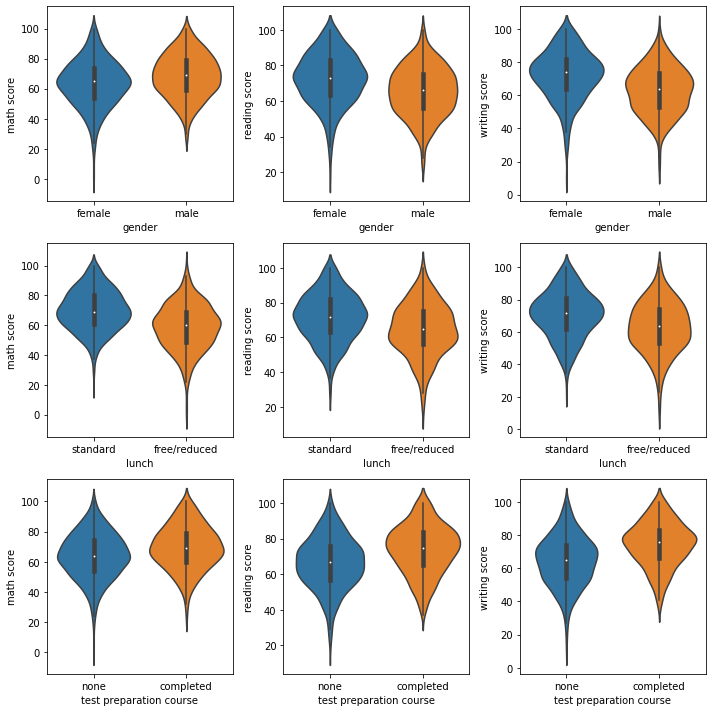

In [21]:
i = 0
plt.figure(figsize = (10, 10))
for bin_col in ['gender', 'lunch', 'test preparation course']:
    for col in num_cols:
        i += 1
        subplot(3, 3, i)
        sns.violinplot(y = df[col], x = df[bin_col])
    plt.tight_layout()

<font size = 3><i>My observations and guesses:
* About gender. Distribution of scores in male class has strikly a lot less kurtosis than in female class. There is in all score attributes. Possible reason for this is female cooperation at preparing to exams(preparing in group etc) or female ability for science(feamle scores more concetrated than male scores). Male class has more smoother peak in distribution.(Because maybe the most of men think that passing exams is a personal matter). By the location of the peak, we can say that men are better at mathematics, and women are better at language exams (it is consistent with the statement that men are better versed in technical sciences, and women in humanities)
* About lunch. When people have standard lunch, they get better scores than people with free lunch. The brain works better at full nutrition.(But if people eat normally lunch, it means that they have more money. So they will have more opportunities to preparing for exams. For example: expensive literature or expensive tutors). As we can see math scores have the largest difference between two class of 'lunch'
* About test preparation course. There is improvement of scores due completed test preparation course(The best improvement of scores - writing exam)

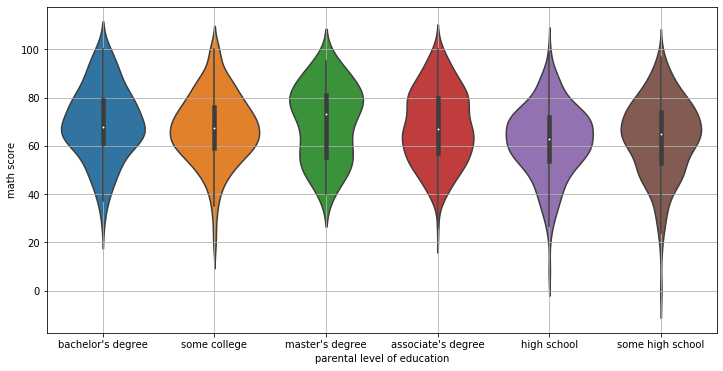

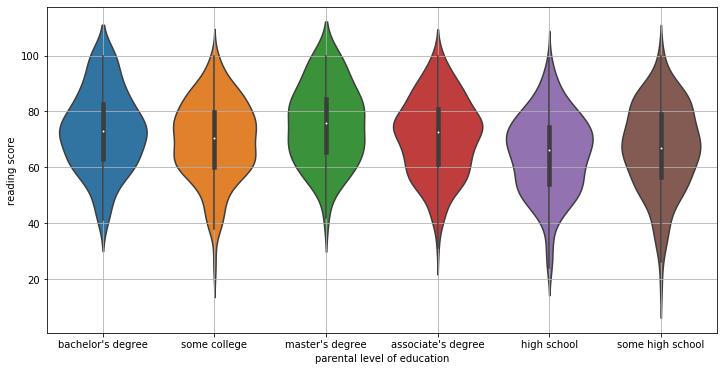

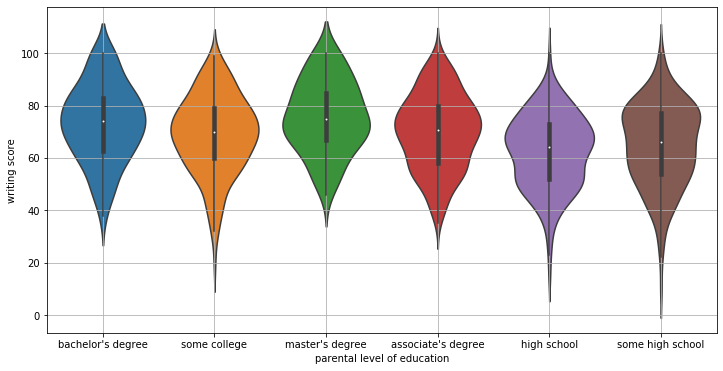

In [36]:
# other categorical features
plt.figure(figsize = (12, 6))
sns.violinplot(x= df['parental level of education'], y = df['math score'])
plt.grid()
plt.show()

plt.figure(figsize = (12, 6))
sns.violinplot(x= df['parental level of education'], y = df['reading score'])
plt.grid()
plt.show()

plt.figure(figsize = (12, 6))
sns.violinplot(x= df['parental level of education'], y = df['writing score'])
plt.grid()
plt.show()

<font size = 3><i>As we can observe, there is dependence between parents's education and scores, but it very hard to see.<br>
As one would expect, mean of score shifts upward with development educational degree of parents.

Можно заметить зависимость между образованием и баллами на предметах, хотя ее очень трудно увидеть. Как и следовало преполагать, с повышением уровня образования распределия баллов на экзаменах смещаются вверх вместе со средним значением.

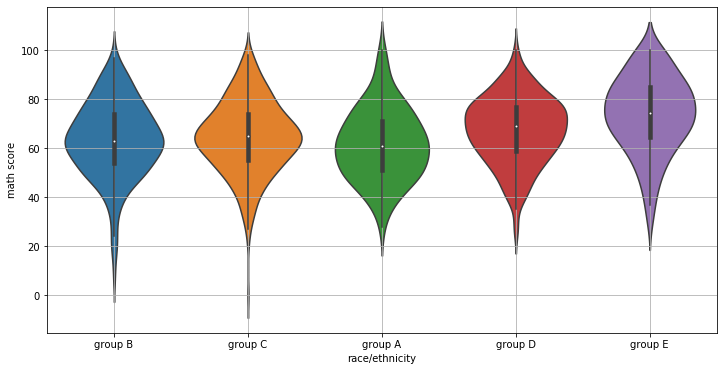

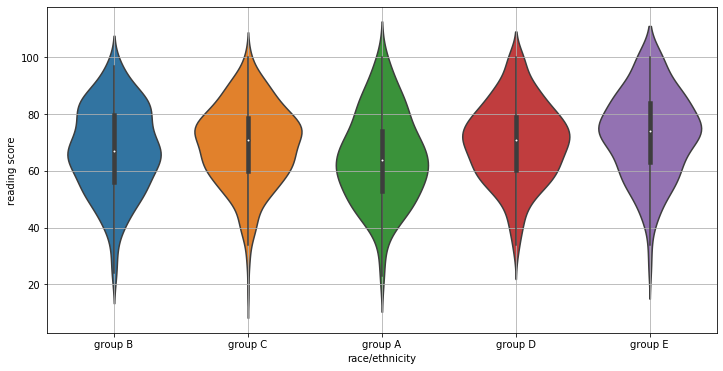

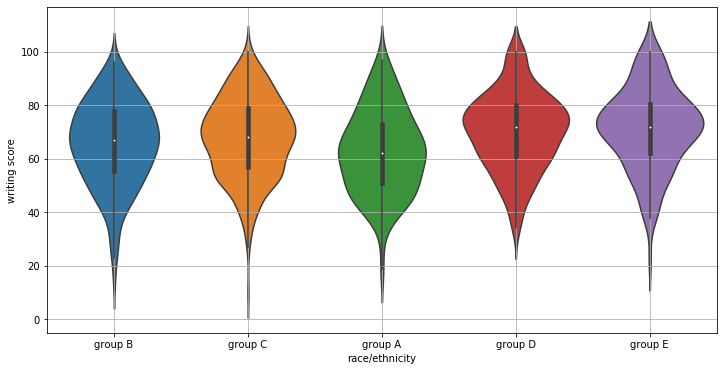

In [37]:
plt.figure(figsize = (12, 6))
sns.violinplot(x= df['race/ethnicity'], y = df['math score'])
plt.grid()
plt.show()

plt.figure(figsize = (12, 6))
sns.violinplot(x= df['race/ethnicity'], y = df['reading score'])
plt.grid()
plt.show()

plt.figure(figsize = (12, 6))
sns.violinplot(x= df['race/ethnicity'], y = df['writing score'])
plt.grid()
plt.show()

About race (четкие закономерности трудно отследить, но некотрые предположения сделать можно):
* Раса Е сдает все экзамены лучше остальных, эта разница заметна в математике, в других экзаменах ее почти нет
* Расы D и C примерно равны(в математике и письме D чуть лучше)
* Раса В немного уступает С и D, распределение ее оценок имеет более тяжелый хвост в направлении нуля, чем у этих двух
* Группа А хуже всех сдает предметы, ее среднее ниже чем у прочих + самые тяжелые хвосты в направление минимальной оценки.

About race(patterns are difficult to trace, but some assumptions can be made):
* Race E passes all exams better than others, this difference is noticeable in mathematics, in other exams it is almost nonexistent
* Races D and C are roughly equal (slightly better in math and D)
* Race B is slightly inferior to C and D, the distribution of its ratings has a heavier tail towards zero than С and D
* Group A passes the subjects worst of all, its average is lower than the others + the heaviest tails in the direction of the minimum mark.

Вероятно это связано с тем, что большинство людей из разных рас по-разному относятся к учебе. Взглянем на корреляции.

This is probably due to the fact that most people from different races have different attitudes towards learning. 
Let's take a look at the correlations.

In [47]:
from sklearn.preprocessing import LabelEncoder

df['parental level of education'] = LabelEncoder().fit_transform(df['parental level of education'])
df['race/ethnicity'] = LabelEncoder().fit_transform(df['race/ethnicity'])

print('Correlation with parental level of education')
print(df[list(num_cols)].corrwith(df['parental level of education']))

print('\nCorrelation with race')
print(df[list(num_cols)].corrwith(df['race/ethnicity']))

Correlation with parental level of education
math score      -0.068279
reading score   -0.072444
writing score   -0.084299
dtype: float64

Correlation with race
math score       0.216415
reading score    0.145253
writing score    0.165691
dtype: float64


# Results of analysis sample

The highest correlation between target features(reading - writing ~ 0.95, math - reading and writing ~ 0.8)

It will be hard to find any dependences beetwen categorical attributes.
Probably next pairs have any dependences:
* 'race/ethnicity', 'parental level of education' 
* 'parental level of education', 'test preparation course'
* 'gender', 'race/ethnicity'

We can find correlation between binury and numerical features:
* High correlation: gender - writing (~ 0.6); lunch - math (~ 0.72); test_prep_course - writing(~ 0.65)
* Average correlation: gender - reading (~ 0.48); lunch - wrinting & reading(~ 0.5); test_prep_course - reading(~ 0.51)
* Low correlation: gender - math (~ 0.33); test_prep_course - math(~ 0.37)

Features "race/ethnicity" and "parental level of education" have very comlex relationships with target attributes. Them correlation is very low. But few pattern in distributions on classes can be found.